## Import Statements

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Clustering

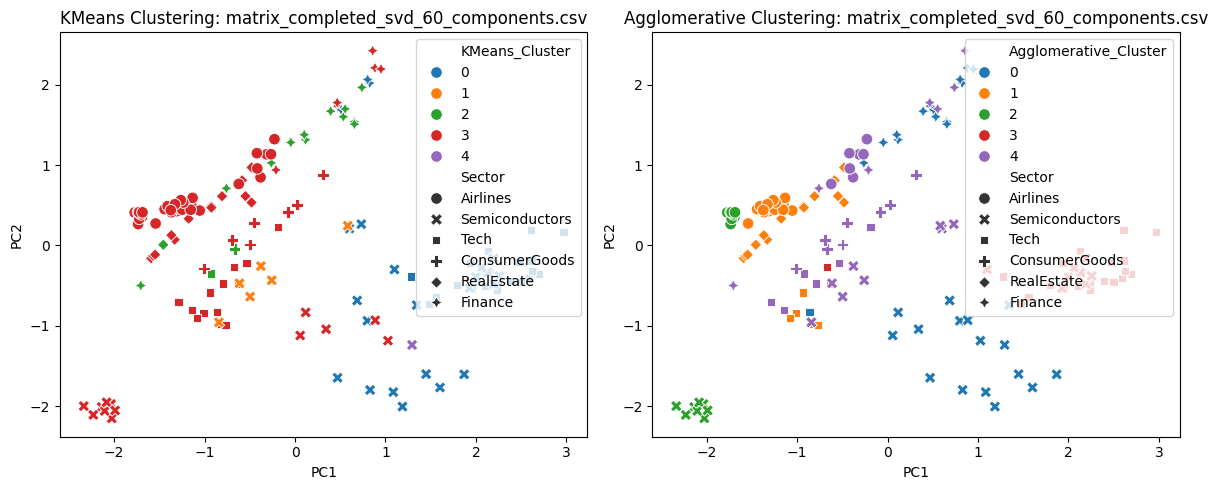

2000-words-kept-data/matrix_completed_svd_60_components.csv:
  KMeans Silhouette: 0.009
  Agglomerative Silhouette: -0.049



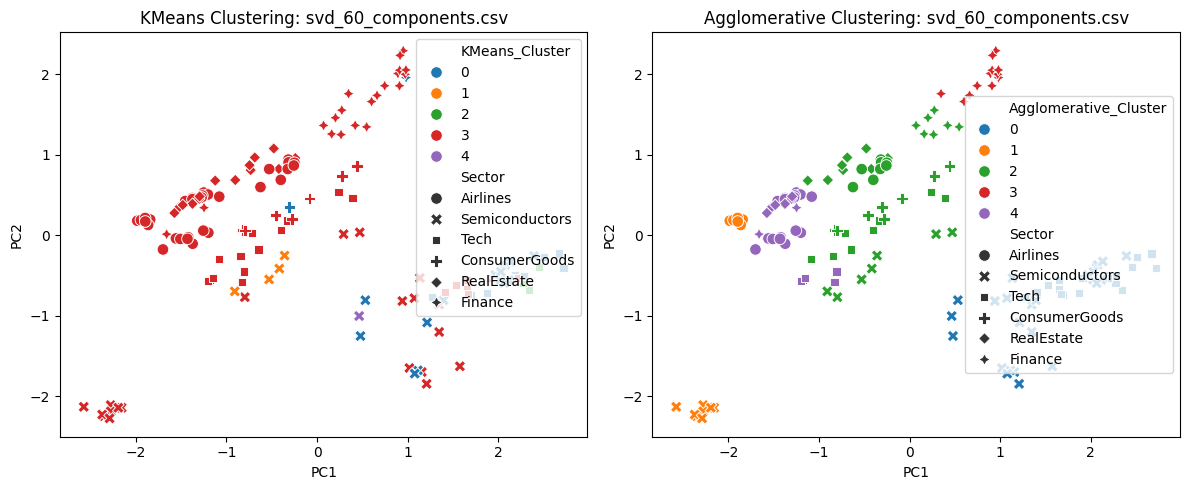

2000-words-kept-data/svd_60_components.csv:
  KMeans Silhouette: 0.023
  Agglomerative Silhouette: -0.046



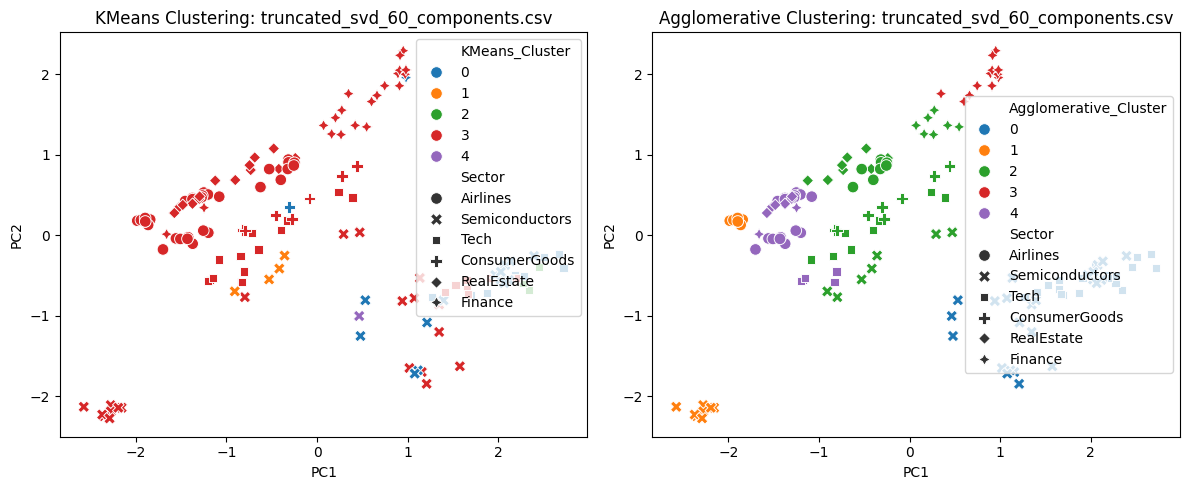

2000-words-kept-data/truncated_svd_60_components.csv:
  KMeans Silhouette: 0.023
  Agglomerative Silhouette: -0.046



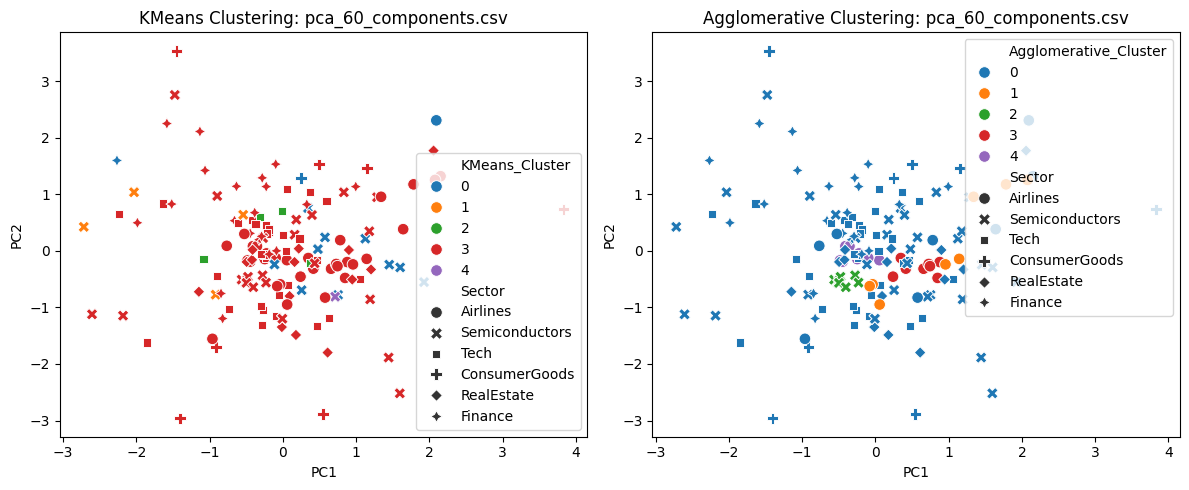

2000-words-kept-data/pca_60_components.csv:
  KMeans Silhouette: 0.018
  Agglomerative Silhouette: -0.054



In [2]:
def cluster_and_visualize(filepath, n_clusters=5):
    # Load data
    df = pd.read_csv(filepath)

    # Select feature columns
    feature_cols = [col for col in df.columns if col.startswith("SVD_") or col.startswith("PC")]
    X = df[feature_cols].values

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    df['KMeans_Cluster'] = kmeans_labels

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(X_scaled)
    df['Agglomerative_Cluster'] = agg_labels

    # Visualize clustering in 2D
    if X_scaled.shape[1] > 2:
        pca = PCA(n_components=2)
        components_2d = pca.fit_transform(X_scaled)
        df['PC1'] = components_2d[:, 0]
        df['PC2'] = components_2d[:, 1]
    else:
        df['PC1'] = X_scaled[:, 0]
        df['PC2'] = X_scaled[:, 1]

    plt.figure(figsize=(12, 5))

    # Plot KMeans
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='tab10', s=70, style="Sector")
    plt.title(f'KMeans Clustering: {filepath.split("/")[-1]}')

    # Plot Agglomerative
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Agglomerative_Cluster', palette='tab10', s=70, style="Sector")
    plt.title(f'Agglomerative Clustering: {filepath.split("/")[-1]}')

    plt.tight_layout()
    plt.show()

    # Silhouette scores
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    agg_silhouette = silhouette_score(X_scaled, agg_labels)

    print(f"{filepath}:\n  KMeans Silhouette: {kmeans_silhouette:.3f}\n  Agglomerative Silhouette: {agg_silhouette:.3f}\n")

# Paths to your files (update paths if needed)
files = [
    "2000-words-kept-data/matrix_completed_svd_60_components.csv",
    "2000-words-kept-data/svd_60_components.csv",
    "2000-words-kept-data/truncated_svd_60_components.csv",
    "2000-words-kept-data/pca_60_components.csv"
]

for file in files:
    cluster_and_visualize(file)